In [ ]:
# import Necessary Labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder,scale, RobustScaler, robust_scale

In [ ]:
# load healthcare-dataset
Data_Real = pd.read_csv(r'/content/drive/MyDrive/Practice_Fatemi/Last_Year_Practice/Datasets/healthcare-dataset-stroke-data.csv')
Data_Real.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
Data_Real['Gender_Married'] = Data_Real.apply(lambda row : 'G_Y' if row['gender'] == 'Male' and row['ever_married'] == 'Yes' else 'G_N',
                                             axis = 1)

In [ ]:
Data_Real.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender_Married
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,G_Y
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,G_N
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,G_Y
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,G_N
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,G_N


In [ ]:
# How to realize if there is missing value or not
Data_Real.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
Data_Real['bmi'] = Data_Real['bmi'].fillna(Data_Real.groupby('stroke')['bmi']
                                                .transform('mean'))

In [ ]:
# how to encode the categorical data
Data_Real.head()
# target.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,1.051434,0,1,1,2,1,2.706375,0.999752,1
1,0,0.786070,0,0,1,3,0,2.121559,0.203664,2
2,1,1.626390,0,1,1,2,0,-0.005028,0.467183,2
3,0,0.255342,0,0,1,2,1,1.437358,0.713983,3
4,0,1.582163,1,0,1,3,0,1.501184,-0.636924,2


In [ ]:
labelencoder = LabelEncoder()
Data_Real['gender'] = labelencoder.fit_transform(Data_Real['gender'])
Data_Real['ever_married'] = labelencoder.fit_transform(Data_Real['ever_married'])
Data_Real['work_type'] = labelencoder.fit_transform(Data_Real['work_type'])
Data_Real['smoking_status'] = labelencoder.fit_transform(Data_Real['smoking_status'])
Data_Real['Residence_type'] = labelencoder.fit_transform(Data_Real['Residence_type'])

In [ ]:
Data_Real = Data_Real.drop(['id'], axis = 1)

In [ ]:
target = Data_Real['stroke']
Data_Real = Data_Real.drop(['stroke'], axis = 1)

In [ ]:
Data_Real['bmi'] = scale(Data_Real['bmi'])
Data_Real['age'] = scale(Data_Real['age'])
Data_Real['avg_glucose_level'] = scale(Data_Real['avg_glucose_level'])

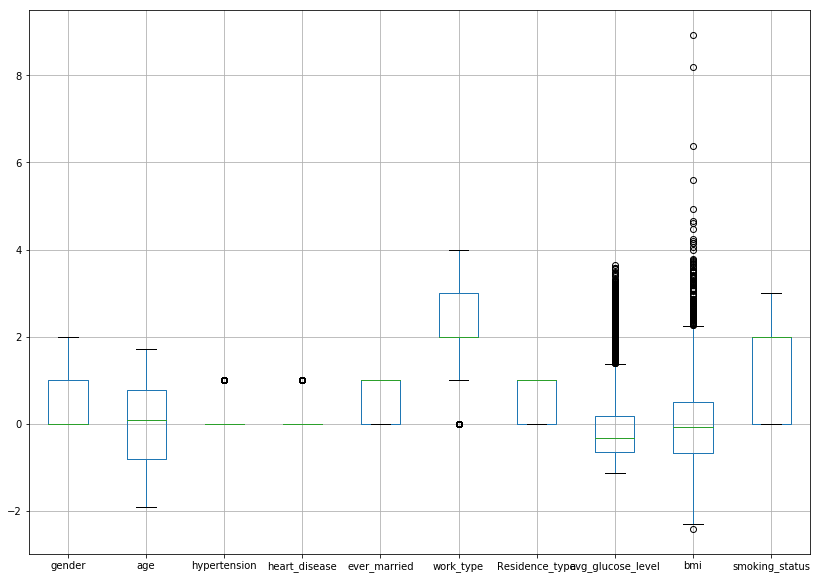

In [ ]:
# plot the data frame for understanding the outliers
Data_Real.boxplot(figsize=(14,10))

In [ ]:
print(Data_Real['bmi'].min())
print(Data_Real['bmi'].max())
print(Data_Real['bmi'].mean())

-2.416483246343565
8.923337936913375
-3.307530374829955e-16


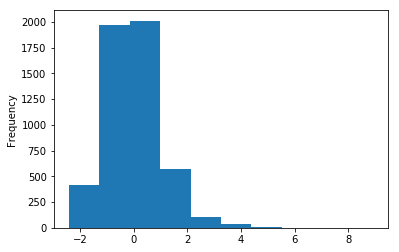

In [ ]:
Data_Real['bmi'].plot.hist()

In [ ]:
condition = Data_Real['gender'] == 1
Data_Real[condition].count()

gender               2115
age                  2115
hypertension         2115
heart_disease        2115
ever_married         2115
work_type            2115
Residence_type       2115
avg_glucose_level    2115
bmi                  2115
smoking_status       2115
dtype: int64